# HHL Algorithm

In [1]:
! pip install cirq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [2]:
pip show cirq

Name: cirq
Version: 1.4.1
Summary: A framework for creating, editing, and invoking Noisy Intermediate Scale Quantum (NISQ) circuits.
Home-page: http://github.com/quantumlib/cirq
Author: The Cirq Developers
Author-email: cirq-dev@googlegroups.com
License: Apache 2
Location: /usr/local/lib/python3.10/dist-packages
Requires: cirq-aqt, cirq-core, cirq-google, cirq-ionq, cirq-pasqal, cirq-rigetti, cirq-web
Required-by: 


In [3]:
#import necessary framework
import cirq
import numpy as np
import sympy
import matplotlib.pyplot as plt

In [5]:
#first defining the unitary matrix (A) and vector b
A=np.array([[1,0],[0,1]])
b= np.array([1,0]) # b should be normalized


Defining my qubits: first my ancilla qubit, then for quantum phase estimation (QFE), I need to define a register
The initial psi is the ancilla vector product tensor with what is given for weights( registers) tensor product with normalized b vector
Also need to define the memory to keep eigenvalues information for us


In [11]:
# create qubits
ancilla=cirq.NamedQubit('ancilla')
register=[cirq.NamedQubit(f"register_{i}") for i in range(2)]
memory=[cirq.NamedQubit(f"memory_{i}") for i in range(2)]
#define circuit
circuit=cirq.Circuit()
#Quantum phase estimation
circuit.append(cirq.H.on_each(register)) # to create superposition between my registers, we use Hadamard here
#then applying control gate on i defined above with one of the registers, and one of the memory
circuit.append(cirq.ControlledGate(cirq.MatrixGate(A)).on(register[0],memory[0]))
#usiing Quantum fourier Transform (QFT), which will here get a vector on its 3 basses then map it to a new vector state (N dimension of Hilbert space= 2^(number of qubits))
circuit.append(cirq.qft(*register))
#define controlled rotation
theta=sympy.Symbol('theta')
circuit.append(cirq.ry(theta).controlled().on(register[0],ancilla))
#inverse QPE (quantum phase estimation) on QFT to have measure implementation:
circuit.append(cirq.qft(*register, inverse=True))
#Measure the Ancilla:
circuit.append(cirq.measure(ancilla, key='result'))
print(circuit)
#Simulate the circuit by using simulator:
sim=cirq.Simulator()
r=sim.run(circuit,param_resolver={'theta':np.pi/4}, repetitions=1000)
print(r.histogram(key='result'))


ancilla: ────────────────────────Ry(theta)───M('result')───
                                 │
                   ┌   ┐         │
memory_0: ─────────│0 1│─────────┼─────────────────────────
                   │1 0│         │
                   └   ┘         │
                   │             │
register_0: ───H───@───────qft───@───────────qft^-1────────
                           │                 │
register_1: ───H───────────#2────────────────#2────────────
Counter({0: 954, 1: 46})


In [12]:
#Simulate the circuit by using simulator:
sim=cirq.Simulator()
r=sim.run(circuit,param_resolver={'theta':np.pi/4}, repetitions=1000)
print(r.histogram(key='result'))


Counter({0: 956, 1: 44})


changing the unitary matrix A here:

In [10]:
A=np.array([[0,1],[1,0]])
b= np.array([1,0])
# create qubits
ancilla=cirq.NamedQubit('ancilla')
register=[cirq.NamedQubit(f"register_{i}") for i in range(2)]
memory=[cirq.NamedQubit(f"memory_{i}") for i in range(2)]
#define circuit
circuit=cirq.Circuit()
#Quantum phase estimation
circuit.append(cirq.H.on_each(register)) # to create superposition between my registers, we use Hadamard here
#then applying control gate on (i) defined above with one of the registers, and one of the memory
circuit.append(cirq.ControlledGate(cirq.MatrixGate(A)).on(register[0],memory[0]))
#usiing Quantum fourier Transform (QFT), which will here get a vector on its 3 basses then map it to a new vector state (N dimension of hilbert space= 2^(number of qubits))
circuit.append(cirq.qft(*register))
#define controlled rotation
theta=sympy.Symbol('theta')
circuit.append(cirq.ry(theta).controlled().on(register[0],ancilla))
#inverse QPE (quantum phase estimation) on QFT to have measure implementation:
circuit.append(cirq.qft(*register, inverse=True))
#Measure the Ancilla:
circuit.append(cirq.measure(ancilla, key='result'))
print(circuit)
#Simulate the circuit by using simulator:
sim=cirq.Simulator()
r=sim.run(circuit,param_resolver={'theta':np.pi/4}, repetitions=1000)
print(r.histogram(key='result'))


ancilla: ────────────────────────Ry(theta)───M('result')───
                                 │
                   ┌   ┐         │
memory_0: ─────────│0 1│─────────┼─────────────────────────
                   │1 0│         │
                   └   ┘         │
                   │             │
register_0: ───H───@───────qft───@───────────qft^-1────────
                           │                 │
register_1: ───H───────────#2────────────────#2────────────
Counter({0: 973, 1: 27})


# Quantum Linear Rergression

In [21]:
import cirq
import numpy as np
# if having Ax=b, the matrix A needs to be unitary, now wanna implement it:
A=np.array([[1,0],[0,1]])
b= np.array([1,0])
#create qubits:
qubits=[cirq.NamedQubit(f'q{i}') for i in range(3)]
#Define circuit
circuit=cirq.Circuit()
#Apply Hadamard gates to have superposition between qubits
circuit.append(cirq.H.on_each(qubits))
#Now Using matrix A as oracle (oracle-based implementation)
#Define oracle for A
def oracle(matrix):
  return cirq.MatrixGate(matrix)

#Now apply the oracle as controlled operator, we add it to the circuit
circuit.append(cirq.ControlledGate(oracle(A)).on(qubits[0],qubits[1]))
circuit



q0: ───H───@───────
           │
           ┌   ┐
q1: ───H───│1 0│───
           │0 1│
           └   ┘

q2: ───H───────────

In the printed circuit above, It could be observed the operation (A), target is q0, and controlled qubit is q2, before that we aplied hadamard on all our qubits to create superposition

Now is the time to apply control rotation on vector b using Ry, but first defining theta is needed. Then applying controlled rotations based on b.
So, the way to find theta is using this code theta=np.arccos(b[0]/np.linalg.norm(b))  which could be break down as such:
np.linalg.norm(b) computes the Euclidean norm (magnitude) of the vector b. This is essentially the length of the vector.
b[0] / np.linalg.norm(b):
This expression computes the ratio of the first component of the vector b to the magnitude (norm) of the vector b. This ratio is essentially the cosine of the angle θ between the vector b and the x-axis (or the direction of the first axis in the coordinate system).
np.arccos is the inverse cosine function, which returns the angle θ (in radians) whose cosine is the given value. The result will be in the range of 0 to π (i.e.,
0
≤
θ
≤
π
0≤θ≤π).
This function takes the ratio b[0] / np.linalg.norm(b) (which must lie between -1 and 1) and computes the corresponding angle. So the The code computes the angle θ between the vector b and the x-axis in a 2D or higher-dimensional space.
Specifically, it calculates the angle of b in the plane formed by the vector and the x-axis, assuming that b[0] corresponds to the x-component of b (the first component).

In [22]:
theta=np.arccos(b[0]/np.linalg.norm(b))  #finding Arccos, by dividing the b[0] to addition of all values on major diagonal
circuit.append(cirq.ry(2*theta).controlled().on(qubits[0],qubits[2])) # apply controlled rotation based on b
circuit

q0: ───H───@───────@───────
           │       │
           ┌   ┐   │
q1: ───H───│1 0│───┼───────
           │0 1│   │
           └   ┘   │
                   │
q2: ───H───────────Ry(0)───

In [24]:
#Doing measurements on all of our qubits:
circuit.append(cirq.measure(*qubits, key= "QLD.results"))
circuit

q0: ───H───@───────@───────M('QLD.results')───
           │       │       │
           ┌   ┐   │       │
q1: ───H───│1 0│───┼───────M──────────────────
           │0 1│   │       │
           └   ┘   │       │
                   │       │
q2: ───H───────────Ry(0)───M──────────────────

In [25]:
#simulator:
sim=cirq.Simulator()
r=sim.run(circuit,repetitions=10**3)
print(circuit)
print(r.histogram(key='QLD.results'))


q0: ───H───@───────@───────M('QLD.results')───
           │       │       │
           ┌   ┐   │       │
q1: ───H───│1 0│───┼───────M──────────────────
           │0 1│   │       │
           └   ┘   │       │
                   │       │
q2: ───H───────────Ry(0)───M──────────────────
Counter({6: 153, 1: 133, 2: 128, 5: 123, 4: 121, 3: 121, 0: 119, 7: 102})


<BarContainer object of 8 artists>

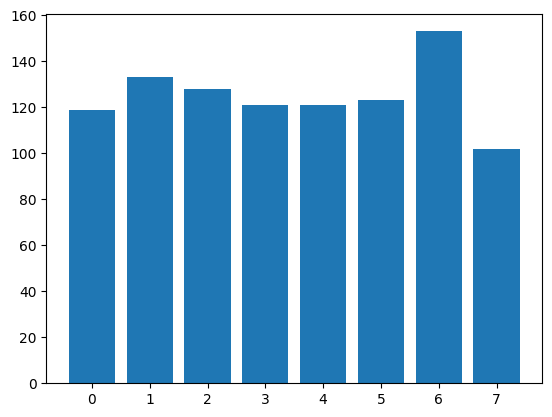

In [26]:
import matplotlib.pyplot as plt
plt.bar(r.histogram(key='QLD.results').keys(),r.histogram(key='QLD.results').values())

<BarContainer object of 8 artists>

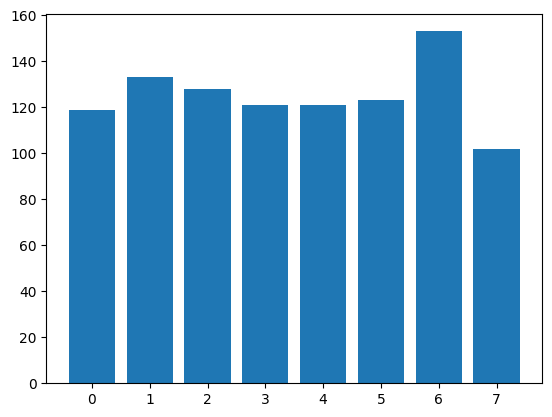

In [27]:
#OR could do the plot differently as such:
x=r.histogram(key='QLD.results').keys()
y=r.histogram(key='QLD.results').values()
plt.bar(x,y)

given that all we did in these codes are oracle-based, the matrix we deal with, has to be unitary. Otherwise, we would get an error. So, for having everything uniary, we need to observe normalization for our data, and making sure that the matrix is unitary. So, there are limitations for HHL, and QLR,that we should watch out for them.